# library

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# memasukkan data

In [95]:
air = pd.read_csv('E:\Clustering\AirQualityItaly.csv')
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# hapus variabel tidak terpakai

In [96]:
air = air.drop(['Date','Time','CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH'], axis = 1)
air

,NMHC,RH
0,150,48.9
1,112,47.7
2,88,54.0
3,80,60.0
4,51,59.6
5,38,59.2
6,31,56.8
7,31,60.0
8,24,59.7
9,19,60.2


In [97]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
NMHC    500 non-null int64
RH      500 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


# visualisasi data

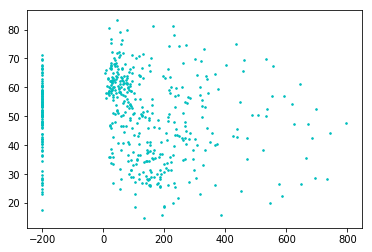

In [98]:
plt.scatter(air.NMHC, air.RH, s = 10, c = 'c', marker = '.', alpha = 1)
plt.show()

# menentukan klaster

In [99]:
air_x = air.iloc[:, 0:2]
air_x.head()

,NMHC,RH
0,150,48.9
1,112,47.7
2,88,54.0
3,80,60.0
4,51,59.6


In [100]:
x_array = np.array(air_x)
print(x_array)

[[ 150.    48.9]
 [ 112.    47.7]
 [  88.    54. ]
 [  80.    60. ]
 [  51.    59.6]
 [  38.    59.2]
 [  31.    56.8]
 [  31.    60. ]
 [  24.    59.7]
 [  19.    60.2]
 [  14.    60.5]
 [   8.    56.2]
 [  16.    58.1]
 [  29.    59.6]
 [  64.    57.4]
 [  87.    60.6]
 [  77.    58.4]
 [  43.    57.9]
 [  61.    66.8]
 [  63.    76.4]
 [ 164.    81.1]
 [  79.    79.8]
 [  95.    71.2]
 [ 150.    67.6]
 [ 307.    64.2]
 [ 461.    69.3]
 [ 401.    67.8]
 [ 197.    64. ]
 [  61.    63.4]
 [  26.    60.8]
 [  55.    58.5]
 [  53.    59.7]
 [  40.    61.8]
 [  21.    62.3]
 [  10.    65.9]
 [   7.    65. ]
 [  17.    62.9]
 [  33.    65.1]
 [ 202.    63.1]
 [-200.    56.2]
 [ 208.    41.7]
 [ 166.    38.4]
 [ 114.    36.5]
 [ 140.    34.5]
 [ 169.    35.7]
 [ 185.    37. ]
 [ 165.    37.2]
 [ 133.    34.3]
 [ 233.    39.6]
 [ 242.    43.4]
 [ 488.    50.5]
 [ 333.    53.3]
 [ 215.    59.1]
 [ 367.    64.6]
 [ 122.    64.1]
 [  67.    63.9]
 [  43.    63.9]
 [  46.    67.5]
 [  56.    71.

In [101]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.35105316, 0.49780381],
       [0.31293882, 0.48023426],
       [0.2888666 , 0.57247438],
       [0.28084253, 0.66032211],
       [0.25175527, 0.65446559],
       [0.23871615, 0.64860908],
       [0.23169509, 0.61346999],
       [0.23169509, 0.66032211],
       [0.22467402, 0.65592972],
       [0.21965898, 0.66325037],
       [0.21464393, 0.66764275],
       [0.20862588, 0.60468521],
       [0.21664995, 0.63250366],
       [0.22968907, 0.65446559],
       [0.26479438, 0.62225476],
       [0.28786359, 0.66910688],
       [0.2778335 , 0.63689605],
       [0.24373119, 0.6295754 ],
       [0.26178536, 0.75988287],
       [0.26379137, 0.90043924],
       [0.36509529, 0.96925329],
       [0.27983952, 0.95021962],
       [0.29588766, 0.82430454],
       [0.35105316, 0.7715959 ],
       [0.50852558, 0.72181552],
       [0.66298897, 0.79648609],
       [0.60280843, 0.77452416],
       [0.39819458, 0.71888726],
       [0.26178536, 0.71010249],
       [0.22668004, 0.67203514],
       [0.

# klaster = 5

In [129]:
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter=100, n_init=10, random_state=123)

In [130]:
c_kmeans = kmeans.fit_predict(x_scaled)

In [131]:
air["Kelas"] = c_kmeans

In [132]:
print(air)

     NMHC    RH  Kelas
0     150  48.9      1
1     112  47.7      1
2      88  54.0      1
3      80  60.0      0
4      51  59.6      0
5      38  59.2      0
6      31  56.8      0
7      31  60.0      0
8      24  59.7      0
9      19  60.2      0
10     14  60.5      0
11      8  56.2      0
12     16  58.1      0
13     29  59.6      0
14     64  57.4      0
15     87  60.6      0
16     77  58.4      0
17     43  57.9      0
18     61  66.8      0
19     63  76.4      0
20    164  81.1      0
21     79  79.8      0
22     95  71.2      0
23    150  67.6      0
24    307  64.2      0
25    461  69.3      4
26    401  67.8      0
27    197  64.0      0
28     61  63.4      0
29     26  60.8      0
..    ...   ...    ...
470   664  35.6      4
471   695  28.8      4
472   735  28.2      4
473   649  26.6      4
474   586  22.5      4
475   546  20.0      4
476   245  21.7      3
477   178  26.5      3
478   130  30.6      3
479   151  34.7      3
480   272  40.4      1
481   301  

# sentroid 5 klaster

In [76]:
print(kmeans.cluster_centers_)

[[3.23402640e-01 2.25027370e-01]
 [3.63576444e-01 4.94959214e-01]
 [2.90571060e-01 7.28121800e-01]
 [2.77555756e-16 5.60618117e-01]
 [7.40143507e-01 4.44794834e-01]]


In [77]:
air['kluster'] = kmeans.labels_

# visualisasi sentroid 5 klaster

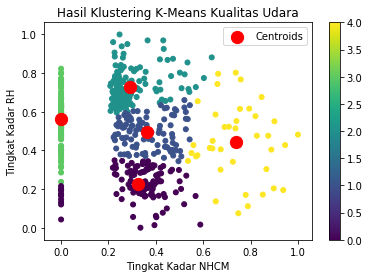

In [78]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = air.kluster, marker = '.', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', label='Centroids', s=150, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means Kualitas Udara')
plt.xlabel('Tingkat Kadar NHCM')
plt.ylabel('Tingkat Kadar RH')
plt.colorbar (output)
plt.legend()
plt.show()